# 답안 작성 방법

아래 이미지에서 "더블클릭 또는 Enter키를 눌러 수정"을 누르신후 해당 창에 답을 적으시면 됩니다.

![image](https://github.com/user-attachments/assets/2aa2ff05-fb0e-4f00-a121-78afeaad4f09)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 08차시 과제

### Q1. 머신러닝에서 분류(classification) 알고리즘에는 어떠한 것들이 5개 이상 서술하라.

1. 로지스틱 회귀
2. k-Means
3. SVM(서포트 백터 머신)
4. K-NN(k-최근접 이웃)
5. 랜덤포레스트

### Q2. 머신러닝에서 회귀(regression) 알고리즘에는 어떠한 것들이 5개 이상 서술하라.

1. 선형 회귀
2. 다항 회귀
3. 릿지 회귀
4. 라쏘 회귀
5. 서포트 벡터 회귀

### Q3. SVM에서 마진(margin)이 무엇이고 어떠한 역할을 하는지 서술하라.

마진: SVM에서 결정 경계와 가장 가까운 데이터 포인트 사이의 거리

역할: 두 클래스 사이를 가능한 멀리하도록 하는 것입니다. 마진이 클수록 일반화 성능 향상됩니다.

### Q4.  이상치(Outlier)가 무엇인지 서술하라.

이상치:  데이터 셋 내에서 다른 데이터들과 크게 다른 값들을 의미합니다.(매우 큰값, 매우 작은 값) 데이터의 분포, 통계를 왜곡할 수 있습니다.

### Q5. Tensorflow에서 모델을 컴파일하는 함수가 무엇인지 적어라.

model.compile()

### Q6. Tensorflow에서 모델을 학습시키는 함수가 무엇인지, 그리고 그 함수의 인자로는 무엇이 필요한지 적어라.

model.fit()
필요한 인자:
x= 학습데이터
y= 학습 데이터 라벨
batch_size= 한번에 처리할 데이터 양
epochs= 데이터 셋의 반복 횟수
validation_data= 검증 데이터

### Q7. 아래 코드는 TensorFlow를 사용하여 붓꽃(Iris) 데이터를 k-means 알고리즘으로 클러스터링하는 코드이다. 코드에 주석을 추가로 달아라.

* 단 시각화 코드에는 주석을 달지 않아도 된다.

수렴되었습니다. 반복 횟수: 3
최종 중심: 
[[-0.63696286  1.7637586  -1.28673248 -1.2380136 ]
 [-1.20910848  0.38421933 -1.31439133 -1.26358919]
 [ 0.50728948 -0.42663134  0.65249366  0.62744675]]
클러스터 할당: 
[1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0
 0 1 1 1 1 1 1 0 1 0 1 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


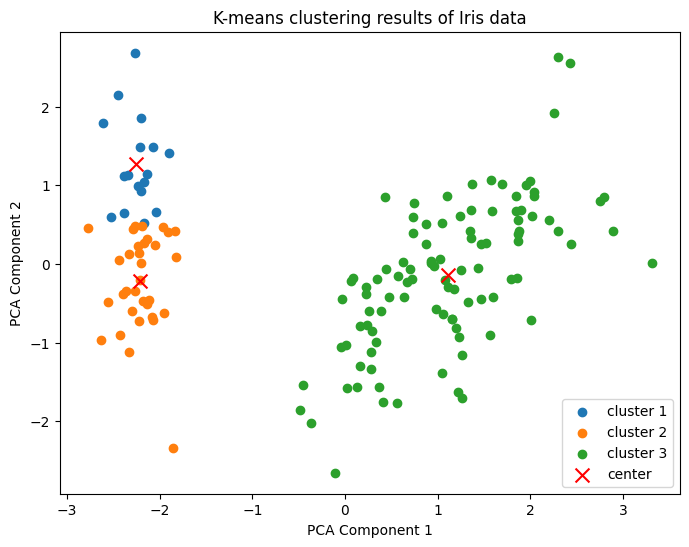

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 붓꽃 데이터 로드
iris = load_iris()
data = iris.data

# 데이터 정규화 (스케일링)
scaler = StandardScaler()
data = scaler.fit_transform(data)

# k-means 매개변수
k = 3  #클러스터 수
max_iterations = 100  # 최대 반복 횟수
tolerance = 1e-4  수렴 기준

# 초기 클러스터 중심을 랜덤하게 선택
centroids = tf.Variable(data[np.random.choice(data.shape[0], k, replace=False)])
#데이터 포인트 중 K개 선택


# k-means 알고리즘
for iteration in range(max_iterations):
    # 각 데이터 포인트와 클러스터 중심 사이의 거리 계산
    distances = tf.norm(data[:, np.newaxis] - centroids, axis=2)

    # 각 데이터 포인트를 가장 가까운 중심에 할당
    closest_centroids = tf.argmin(distances, axis=1)


    new_centroids = []  #새로운 클러스터 중심 계싼
    for c in range(k):
        # 해당 클러스터에 속하는  데이터 포인트 선택
        assigned_points = tf.gather(data, tf.where(closest_centroids == c))
        assigned_points = tf.squeeze(assigned_points, axis=1)

        #새로운 클러스터 중심은 해당 클러스터에 속하는 데이터 포인트의 평균
        new_centroids.append(tf.reduce_mean(assigned_points, axis=0))

    #새로운 클러스터 중심을 스택하여 텐서로 변환
    new_centroids = tf.stack(new_centroids)

    #클러스터 중심의 이동량 계산(수렴 확인)
    centroid_shift = tf.reduce_sum(tf.abs(new_centroids - centroids))

    #클러스터 중심 업데이트
    centroids.assign(new_centroids)

    #클러스터 중심 이동이  tolerance 이하면 수렴으로 간주해 반복 종료
    if centroid_shift < tolerance:
        print(f'수렴되었습니다. 반복 횟수: {iteration}')
        break

print(f'최종 중심: \n{centroids.numpy()}')
print(f'클러스터 할당: \n{closest_centroids.numpy()}')


# 시각화

# 2D로 시각화를 위해 PCA를 사용하여 데이터 차원 축소
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
reduced_centroids = pca.transform(centroids.numpy())

plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = reduced_data[closest_centroids.numpy() == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'cluster {i + 1}')

plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], color='red', marker='x', s=100, label='center')
plt.title('K-means clustering results of Iris data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
